In [1]:
from pharmapynetics.models import PBFTPK, EPBFTPK
import numpy as np

In [2]:
samples = np.load('samples.npy')

In [3]:
import matplotlib.pyplot as plt

In [4]:
from joblib import Parallel, delayed

In [5]:
import scipy.stats as stats

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
t, X = samples[50]

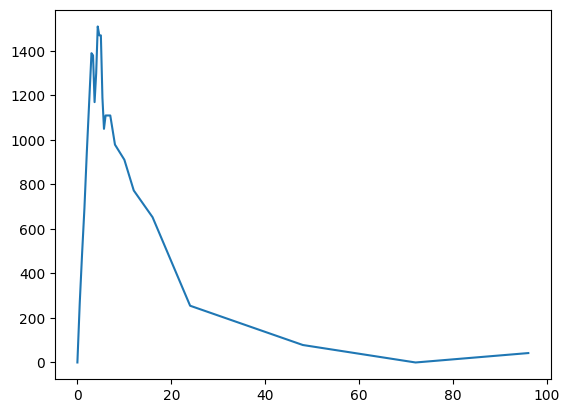

In [8]:
plt.plot(t, X)

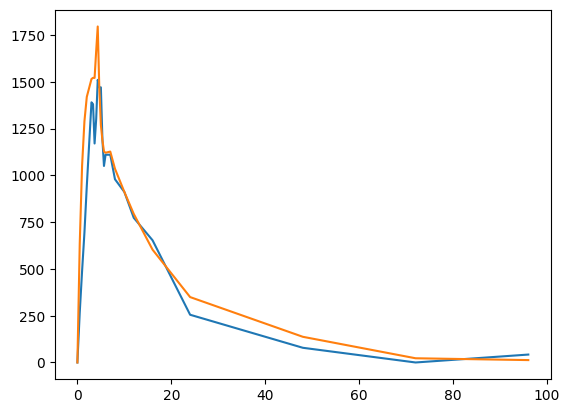

In [111]:
model1 = EPBFTPK(tau_estimation_method='peak', l=140.25, n_models=10, clipped=True)
model1.fit(t, X)
X_sample = model1.sample(t)
plt.plot(t, X)
plt.plot(t, X_sample)

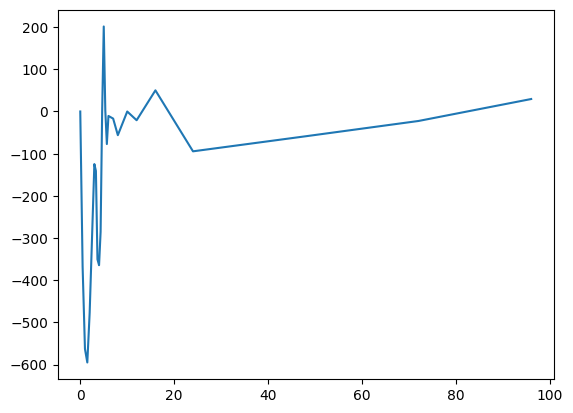

In [112]:
r = X - X_sample
plt.plot(t, r)

In [113]:
model2 = PBFTPK(tau_estimation_method='minmax')
model2.fit(t, r)
model2.tau_0, model2.tau

(np.float64(0.015625), np.float64(0.05208333333333333))

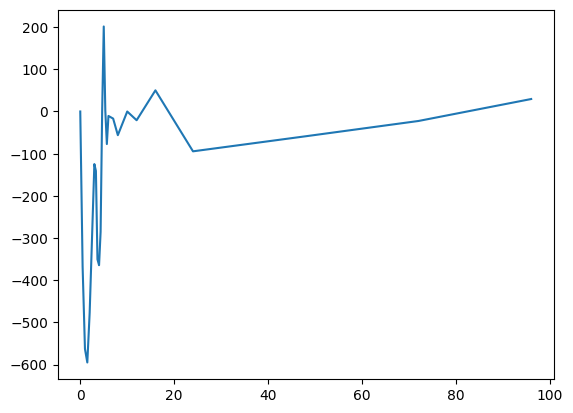

In [114]:

r2 = model2.sample(t)
plt.plot(t, r + r2)